<a href="https://colab.research.google.com/github/choisooyeon007/hello-world/blob/master/study_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special
import seaborn as sns
import statsmodels.api as sm
import sklearn as sk
from sklearn import linear_model
from sklearn.linear_model import LinearRegression



In [0]:
from sklearn.datasets import make_regression
X0, y, coef = make_regression(n_samples=100, n_features=2,
                              bias=100, noise=10, coef=True, random_state=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


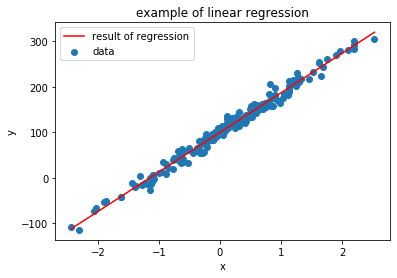

In [17]:
X0[:3]
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X = sm.add_constant(X0)
X[:3]
bias = 100

X0, y, w = make_regression(n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)
w
w = np.linalg.lstsq(X, y)[0]

x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="result of regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("example of linear regression")
plt.legend()
plt.show()


In [23]:
 model = LinearRegression().fit(X0,y)
print(model.coef_,model.intercept_)

[[86.96171201]] [99.79150869]


In [24]:
model.predict([[3]])

array([[360.67664473]])

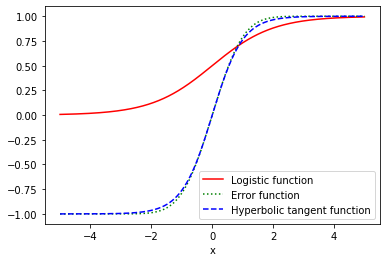

In [0]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="Logistic function")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="Error function")
plt.plot(xx, np.tanh(xx), 'b--', label="Hyperbolic tangent function")
plt.ylim([-1.1, 1.1])
plt.legend(loc=0)
plt.xlabel("x")
plt.show()

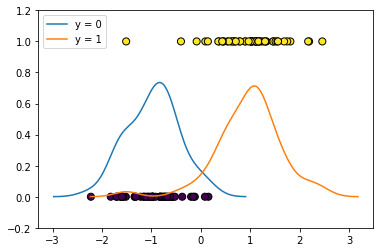

In [0]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=50, edgecolor="k", linewidth=1)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()


In [0]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                  0.7679
Time:                        09:32:03   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006
